In [29]:
import os
import json
import pickle
from pathlib import Path
#
import rdkit
from rdkit import IPythonConsole
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdMolAlign
print(rdkit.__version__)
#
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
draw_options = Chem.Draw.MolDrawOptions()
draw_options.addAtomIndices = True
#
import IPython
import py3Dmol
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2025.03.3


## Preparing Osimertinib for Co-folding

### remember to put all pkl files in boltz environment (.boltz folder)

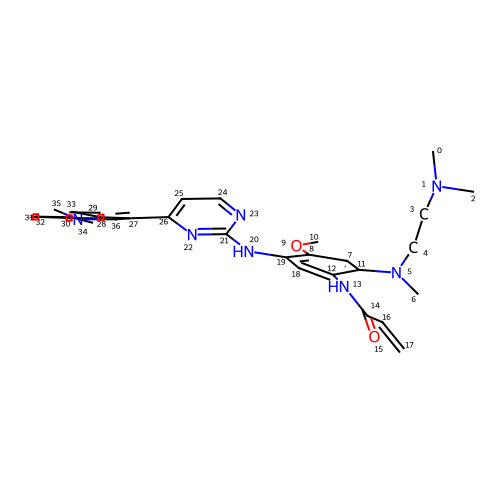

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
#check default CCD for Osimertinib
with open('pkl/YY3.pkl', 'rb') as f:
        yy3 = pickle.load(f)
IPython.display.display(Chem.Draw.MolToImage(yy3, size=(500, 500), options=draw_options))
v = py3Dmol.view(width=500,height=500)
v.removeAllModels()
IPythonConsole.addMolToView(yy3,v,confId=0)
v.zoomTo()
v.show()

In [10]:
#get reactive atom index
for atom in yy3.GetAtoms():
    if atom.GetIdx() == 17:
        print(atom.GetPropsAsDict())

{'name': 'C9', 'alt_name': 'C13', 'leaving_atom': False, '__computedProps': <rdkit.rdBase._vectSs object at 0x73a59e961540>}


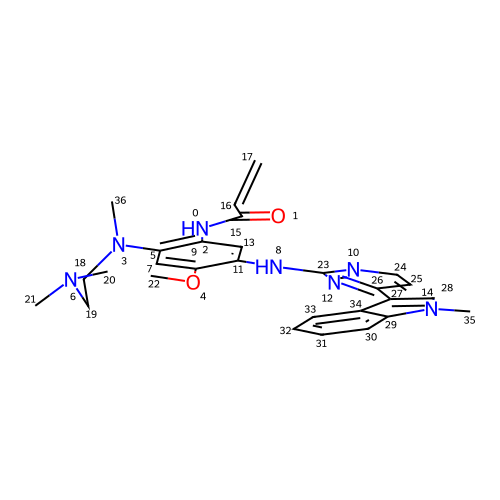

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
#extract bioactive conformation of Osimertinib from PDB 6JXT
ref_mol = Chem.SDMolSupplier(os.path.join('covalent_kinase_inhibitor/6JXT_bioactive_ligand_aligned_by_protein', 'obj01.sdf'))[0]
IPython.display.display(Chem.Draw.MolToImage(ref_mol, size=(500, 500), options=draw_options))
v = py3Dmol.view(width=500,height=500)
v.removeAllModels()
IPythonConsole.addMolToView(ref_mol,v,confId=0)
v.zoomTo()
v.show()

In [12]:
#remove bioactive 3D information and create blind Osimertinib object
clean_mol = Chem.MolFromSmiles(Chem.MolToSmiles(ref_mol))

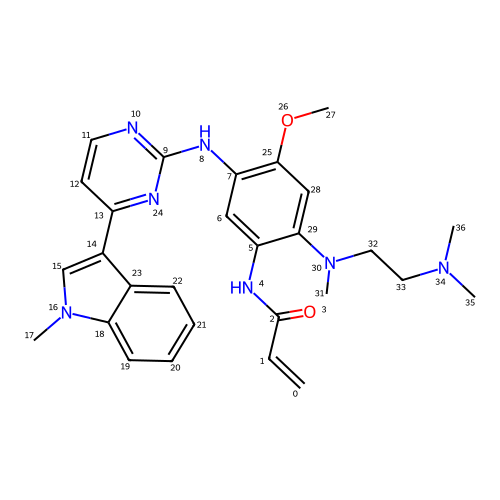

In [15]:
#set atomic name for clean Osimertinib
for idx, atom in enumerate(clean_mol.GetAtoms()):
    default_name = f'{atom.GetSymbol()}{str(atom.GetIdx())}'
    atom.SetProp('name', default_name)
#check atomic name
IPython.display.display(Chem.Draw.MolToImage(clean_mol, size=(500, 500), options=draw_options))

In [16]:
#get reactive atom index
for atom in clean_mol.GetAtoms():
    if atom.GetIdx() == 0:
        print(atom.GetPropsAsDict())

{'__computedProps': <rdkit.rdBase._vectSs object at 0x73a59c2367c0>, '_CIPRank': 0, 'name': 'C0'}


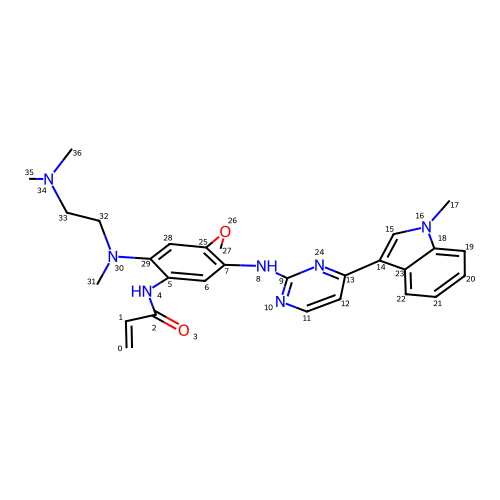

In [18]:
#embed a random conformer for Osimertinib
clean_mol_H = AllChem.AddHs(clean_mol)
AllChem.EmbedMolecule(clean_mol_H)
AllChem.MMFFOptimizeMolecule(clean_mol_H)
clean_mol_no_H = Chem.RemoveHs(clean_mol_H)
IPython.display.display(Chem.Draw.MolToImage(clean_mol_no_H, size=(500, 500), options=draw_options))

In [ ]:
#prepare clean Osimertinib replicates for boltz2
#do this will cover existing files!!!
'''
cache_dir = Path("pkl")
for i in range(1, 5): 
    ccd_path = cache_dir / f'YY3_{i}.pkl'
    with ccd_path.open("wb") as file:
        pickle.dump(clean_mol_no_H, file)
'''

## Following analysis on performance of Osimertinib co-folding prediction

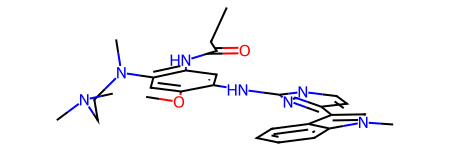

In [21]:
#change covalent bond topology from bioactive reference (used for comparing with co-folding results)
emol = Chem.EditableMol(ref_mol)
emol.RemoveBond(16, 17)
emol.AddBond(16, 17, Chem.rdchem.BondType.SINGLE)
modified_mol = emol.GetMol()
modified_mol

In [23]:
for i in os.listdir('covalent_kinase_inhibitor/6JXT_bioactive_ligand_aligned_by_protein'):
    if i != 'obj01.sdf':
        print(i)
        query_mol = Chem.SDMolSupplier(os.path.join('covalent_kinase_inhibitor/6JXT_bioactive_ligand_aligned_by_protein', i))[0]
        print(rdMolAlign.CalcRMS(query_mol, modified_mol))

obj02.sdf
1.1764696083875092
obj03.sdf
2.6854090283846386
obj04.sdf
2.528888369235395
obj05.sdf
1.7017306420547607
obj06.sdf
1.7232568626280285


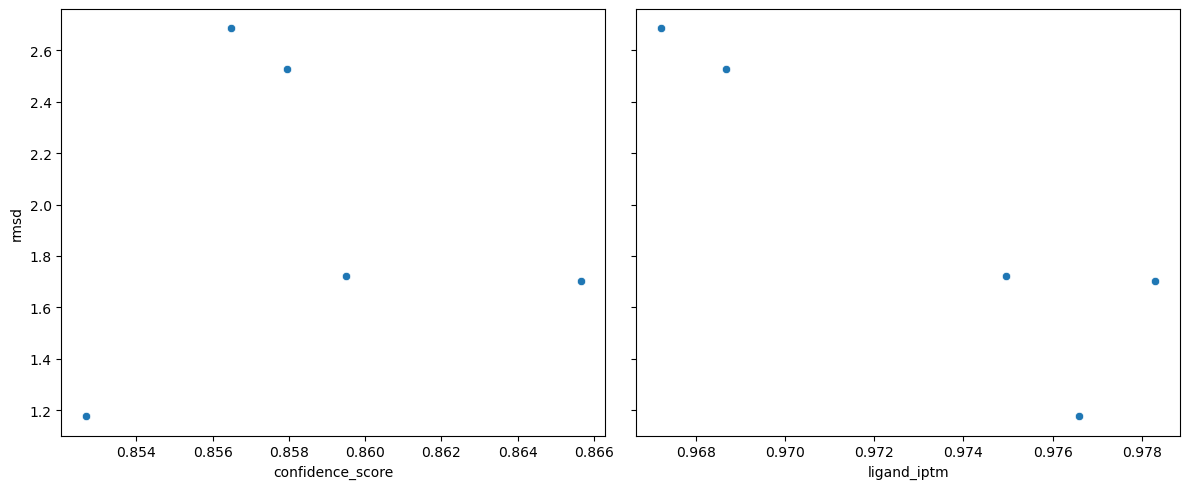

In [24]:
df = pd.DataFrame({'rmsd': [1.1764696083875092, 2.6854090283846386, 2.528888369235395, 1.7017306420547607, 1.7232568626280285], 
             'ligand_iptm': [0.9765998125076294, 0.9672098755836487, 0.9686796069145203, 0.9783051013946533, 0.9749552011489868],
                  'confidence_score': [0.8526812791824341, 0.8564938902854919, 0.8579563498497009, 0.865651547908783, 0.859502911567688]})

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.scatterplot(df, x='confidence_score', y='rmsd', ax=axes[0])
sns.scatterplot(df, x='ligand_iptm', y='rmsd', ax=axes[1])
plt.tight_layout()
plt.show()

## Preparing Elironrasib for Co-folding

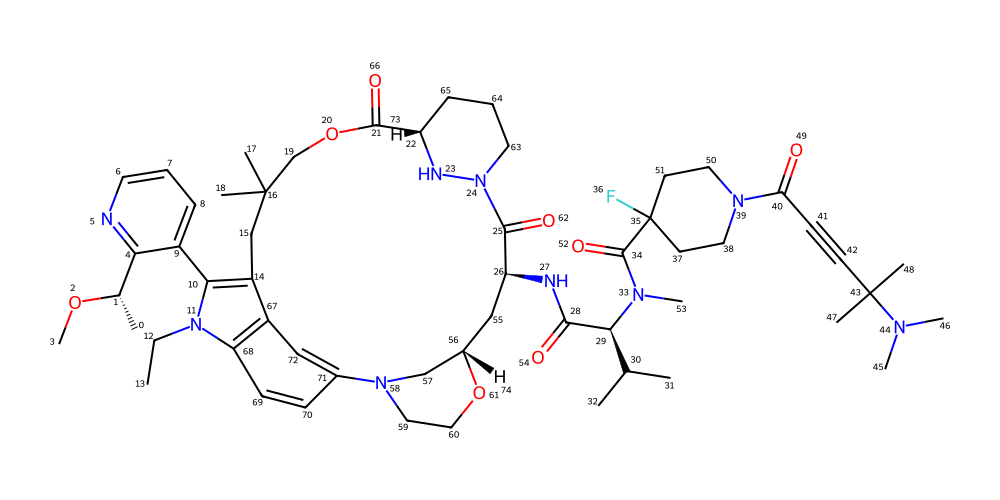

In [26]:
Elironrasib = Chem.MolFromSmiles('C[C@H](OC)C(N=CC=C1)=[C@@]1[C@](N2CC)=C(CC(C)(C)COC([C@H]3NN(C([C@@H](NC([C@H](C(C)C)N(C(C4(F)CCN(C(C#CC(N(C)C)(C)C)=O)CC4)=O)C)=O)C[C@H]5CN6CCO5)=O)CCC3)=O)C7=C2C=CC6=C7')
IPython.display.display(Chem.Draw.MolToImage(Elironrasib, size=(1000, 500), options=draw_options))

In [ ]:
#embedding low energy conformations searched by ETKDG and minimised by MMFF
ps = rdDistGeom.ETKDGv3()
ps.numThreads = 16 

Elironrasib_H = AllChem.AddHs(Elironrasib)    
AllChem.EmbedMolecule(Elironrasib_H)
AllChem.EmbedMultipleConfs(Elironrasib_H, 1000, ps)
res = AllChem.MMFFOptimizeMoleculeConfs(Elironrasib_H)

min_conf_list = []
for x, y in enumerate(res):
    min_conf_list.append((x, y))

min_conf_list.sort(key=lambda x: x[-1][-1])
cache_dir = Path("pkl")

for i in range(0, 5):
    if min_conf_list[i][-1][0] == 1:
        conf_id = min_conf_list[i][0]
        conf_obj = Elironrasib_H.GetConformer(conf_id)
        #
        ccd = Chem.Mol(Elironrasib_H)
        ccd.RemoveAllConformers()
        ccd.AddConformer(conf_obj, assignId=True)
        #print(ccd.GetConformer().GetId())
        ccd.SetProp("MMFF_energy", str(min_conf_list[i][-1][-1]))
        ccd_no_H = Chem.RemoveHs(ccd)
        #
        for idx, atom in enumerate(ccd_no_H.GetAtoms()):
            default_name = f'{atom.GetSymbol()}{str(atom.GetIdx())}'
            atom.SetProp('name', default_name)
        #
        v = py3Dmol.view(width=500,height=500)
        v.removeAllModels()
        IPythonConsole.addMolToView(ccd_no_H,v)
        v.zoomTo()
        v.show()
        v.close()
        #
        ccd_path = cache_dir / f'A1AOD_{i}.pkl'
        with ccd_path.open("wb") as file:
            pickle.dump(ccd_no_H, file)
    else:
        continue

In [ ]:
#set bioactive pose to ccd
suppl = Chem.SDMolSupplier("bioactive.sdf")
mol = suppl[0]
emol = Chem.RWMol(mol)
emol.RemoveBond(30, 31)
emol.AddBond(30, 31, Chem.BondType.TRIPLE)
mol_t = Chem.Mol(emol)
#
Elironrasib = Chem.MolFromSmiles('C[C@H](OC)C(N=CC=C1)=[C@@]1[C@](N2CC)=C(CC(C)(C)COC([C@H]3NN(C([C@@H](NC([C@H](C(C)C)N(C(C4(F)CCN(C(C#CC(N(C)C)(C)C)=O)CC4)=O)C)=O)C[C@H]5CN6CCO5)=O)CCC3)=O)C7=C2C=CC6=C7')
Elironrasib_canonical_smiles_1 = Chem.MolToSmiles(Elironrasib, canonical=True)
list_1 = list(map(int, Elironrasib.GetProp("_smilesAtomOutputOrder")[1:-1].split(",")))
#
Elironrasib_canonical_smiles_2 = Chem.MolToSmiles(mol_t, canonical=True)
list_2 = list(map(int, mol_t.GetProp("_smilesAtomOutputOrder")[1:-1].split(",")))
#
if Elironrasib_canonical_smiles_1 == Elironrasib_canonical_smiles_2:
    print(True)
    res = list(zip(list_2,list_1))
    res.sort(key=lambda x: x[1])
    unzipped_list_2, unzipped_list_1 = zip(*res)
    new_indices = list(unzipped_list_2)
#
mol_t_r = Chem.RenumberAtoms(mol_t, new_indices)
IPython.display.display(Chem.Draw.MolToImage(mol_t_r, size=(1000, 500), options=draw_options))
#
for idx, atom in enumerate(mol_t_r.GetAtoms()):
    default_name = f'{atom.GetSymbol()}{str(atom.GetIdx())}'
    atom.SetProp('name', default_name)
#
cache_dir = Path("pkl")
ccd_path = cache_dir / f'A1AOD_bioactive.pkl'
with ccd_path.open("wb") as file:
    pickle.dump(mol_t_r, file)

In [ ]:
#check bioactive pose and save to sdf
with open('pkl/A1AOD_bioactive.pkl', 'rb') as f:
        mol = pickle.load(f)
#
AllChem.Compute2DCoords(mol)
IPython.display.display(Chem.Draw.MolToImage(mol, size=(1000, 500), options=draw_options))
for atom in mol.GetAtoms():
    print(atom.GetPropsAsDict())
#
writer = Chem.SDWriter('bioactive_renumbered.sdf')
writer.write(mol)
writer.close()

In [ ]:
#reload random embedded conformer and check MMFF minimised energy
with open('pkl/A1AOD.pkl', 'rb') as f:
    mol = pickle.load(f)
mol_1 = Chem.Mol(mol)
mol_H = Chem.AddHs(mol_1, addCoords=True)
AllChem.MMFFOptimizeMolecule(mol_H)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol_H, mmffVariant='MMFF94')
ff = AllChem.MMFFGetMoleculeForceField(mol_H, mmff_props)
print(ff.CalcEnergy())
mol_2 = Chem.RemoveHs(mol_H)
v = py3Dmol.view(width=500,height=500)
v.removeAllModels()
IPythonConsole.addMolToView(mol_2,v,confId=0)
v.zoomTo()
v.show()

In [ ]:
#reload 5 ETKDG MMFF minimised conformer and recheck energy
for i in range(0, 5):
    with open(f'pkl/A1AOD_{i}.pkl', 'rb') as f:
        mol = pickle.load(f)
    print(i)
    print(mol.GetProp('MMFF_energy'))
    mol_1 = Chem.Mol(mol)
    mol_H = Chem.AddHs(mol_1, addCoords=True)
    AllChem.MMFFOptimizeMolecule(mol_H) # this change energy again after protonation...
    mmff_props = AllChem.MMFFGetMoleculeProperties(mol_H, mmffVariant='MMFF94')
    ff = AllChem.MMFFGetMoleculeForceField(mol_H, mmff_props)
    print(ff.CalcEnergy())
    mol_2 = Chem.RemoveHs(mol_H)
    v = py3Dmol.view(width=500,height=500)
    v.removeAllModels()
    IPythonConsole.addMolToView(mol_2,v,confId=0)
    v.zoomTo()
    v.show()
    v.close()

In [ ]:
#reload bioactive and minimise covalent precursor and recheck
with open('pkl/A1AOD_bioactive.pkl', 'rb') as f:
    mol = pickle.load(f)
mol_1 = Chem.Mol(mol)
mol_H = Chem.AddHs(mol_1, addCoords=True)
#
emol = Chem.EditableMol(mol_H)
hydrogens_to_remove_indices = set()
for target_heavy_atom_idx in [41, 42]:
    heavy_atom = mol_H.GetAtomWithIdx(target_heavy_atom_idx)
    for neighbor in heavy_atom.GetNeighbors():
        if neighbor.GetAtomicNum() == 1:
            hydrogens_to_remove_indices.add(neighbor.GetIdx())
sorted_hydrogens_to_remove = sorted(list(hydrogens_to_remove_indices), reverse=True)

for h_idx in sorted_hydrogens_to_remove:
    emol.RemoveAtom(h_idx)

modified_mol = emol.GetMol()
Chem.SanitizeMol(modified_mol)
#
AllChem.MMFFOptimizeMolecule(modified_mol)
mmff_props = AllChem.MMFFGetMoleculeProperties(modified_mol, mmffVariant='MMFF94')
ff = AllChem.MMFFGetMoleculeForceField(modified_mol, mmff_props)
print(ff.CalcEnergy())
#
writer = Chem.SDWriter('macrocyclic_MG/bioactive_MMFF_min.sdf')
writer.write(modified_mol)
writer.close()
mol_ref_min = Chem.RemoveHs(modified_mol)
v = py3Dmol.view(width=500,height=500)
v.removeAllModels()
IPythonConsole.addMolToView(mol,v,confId=0)
IPythonConsole.addMolToView(mol_ref_min,v,confId=0)
v.setStyle({'model': 0, 'elem': 'C'}, {'stick': {'color': 'blue'}})
v.zoomTo()
v.show()
mol_ref_min_2D = Chem.Mol(mol_ref_min)
AllChem.Compute2DCoords(mol_ref_min_2D)
IPython.display.display(Chem.Draw.MolToImage(mol_ref_min_2D, size=(1000, 500), options=draw_options))

## Following analysis on performance of Elironrasib co-folding prediction

In [ ]:
#Use DockQ to check performance on KRAS and CYPA proteins 
from DockQ.DockQ import load_PDB, run_on_all_native_interfaces

final_dict = {'model': [], 'DockQ_for_proteins': [], 'confidence_score': [], 'protein_iptm': []}
native = load_PDB("macrocyclic_MG/9BFX_clean.pdb")
chain_map = {"C":"A", "B":"B"} #native:model
for i in range(1, 16):
    model_path = f'macrocyclic_MG/9BFX_ternary/no_use_potentials/boltz_results_9BFX_{i}/predictions/9BFX_{i}/9BFX_{i}_model_0.cif'
    model = load_PDB(model_path)
    res = run_on_all_native_interfaces(model, native, chain_map=chain_map)
    final_dict['DockQ_for_proteins'].append(res[-1])
    json_path = f'macrocyclic_MG/9BFX_ternary/no_use_potentials/boltz_results_9BFX_{i}/predictions/9BFX_{i}/confidence_9BFX_{i}_model_0.json'
    with open(json_path, 'r') as file:
        data = file.read()
    confidence_data = json.loads(data)
    final_dict['confidence_score'].append(confidence_data['confidence_score'])
    final_dict['protein_iptm'].append(confidence_data['protein_iptm'])
    final_dict['model'].append(i)

df = pd.DataFrame(final_dict)
df

In [ ]:
#plotting for correlation
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.scatterplot(df, x='confidence_score', y='DockQ_for_proteins', ax=axes[0])
sns.scatterplot(df, x='protein_iptm', y='DockQ_for_proteins', ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
#check rmsd to bioactive for all generated ligands with right stereochemistry
for i in os.listdir('/macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_bioactive_ligand_aligned_by_CYPA'):
    if i in ['obj03.sdf', 'obj06.sdf',  'obj07.sdf',  'obj09.sdf',  'obj12.sdf',  'obj13.sdf',  'obj14.sdf']:
        probe_mol = Chem.SDMolSupplier(os.path.join('9BFX_bioactive_ligand_aligned_by_CYPA', i))[0]
        ref_mol = Chem.SDMolSupplier('bioactive_renumbered.sdf')[0]
        print(i)
        print(rdMolAlign.CalcRMS(probe_mol, ref_mol))# in situ alignment under CYPA
        print(rdMolAlign.GetBestRMS(probe_mol, ref_mol))#best ligand alignment

In [ ]:
#compare MMFF minimised ligands from ternary co-folding to MMFF minimised ligand from bioactive (best RMS calculated but saved structures are not aligned)
mol_ref_min = Chem.SDMolSupplier('macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_ligand_min/bioactive_min.sdf')[0]
mol_ref_min = Chem.AddHs(mol_ref_min, addCoords=True)
AllChem.MMFFOptimizeMolecule(mol_ref_min)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol_ref_min, mmffVariant='MMFF94')
ff = AllChem.MMFFGetMoleculeForceField(mol_ref_min, mmff_props)
reference_energy = ff.CalcEnergy()
print(reference_energy)
#
for i in os.listdir('macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_bioactive_ligand_aligned_by_CYPA'):
    file_path = os.path.join('macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_bioactive_ligand_aligned_by_CYPA', i)
    mol = Chem.SDMolSupplier(file_path)[0]
    mol_1 = Chem.Mol(mol)
    mol_H = Chem.AddHs(mol_1, addCoords=True)
    #
    emol = Chem.EditableMol(mol_H)
    hydrogens_to_remove_indices = set()
    for target_heavy_atom_idx in [40, 41]:
        heavy_atom = mol_H.GetAtomWithIdx(target_heavy_atom_idx)
        for neighbor in heavy_atom.GetNeighbors():
            if neighbor.GetAtomicNum() == 1:
                hydrogens_to_remove_indices.add(neighbor.GetIdx())
    sorted_hydrogens_to_remove = sorted(list(hydrogens_to_remove_indices), reverse=True)
        
    for h_idx in sorted_hydrogens_to_remove:
        emol.RemoveAtom(h_idx)
    
    emol.RemoveBond(40, 41)
    emol.AddBond(40, 41, Chem.rdchem.BondType.TRIPLE)
        
    modified_mol = emol.GetMol()
    Chem.SanitizeMol(modified_mol)
    #
    AllChem.MMFFOptimizeMolecule(modified_mol)
    mmff_props = AllChem.MMFFGetMoleculeProperties(modified_mol, mmffVariant='MMFF94')
    ff = AllChem.MMFFGetMoleculeForceField(modified_mol, mmff_props)
    #
    mol_2 = Chem.RemoveHs(modified_mol)
    current_smiles = Chem.MolToSmiles(mol_2, canonical=True)
    if current_smiles == canonical_smiles:
        print(i)
        print(ff.CalcEnergy() - reference_energy)
        print(rdMolAlign.GetBestRMS(mol_2, mol_ref_min))
        writer = Chem.SDWriter(f'macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_ligand_min/{i.split('.')[-2]}_min.sdf')
        writer.write(modified_mol)
        writer.close()

In [ ]:
#compare MMFF + XTB minimised ligands from ternary co-folding to MMFF + XTB minimised ligand from bioactive
mol_dict = {}
for i in os.listdir('macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_ligand_min'):
    if os.path.isdir(os.path.join('macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_ligand_min', i)):        
        file_path = os.path.join('macrocyclic_MG/9BFX_ternary/no_use_potentials/9BFX_ligand_min', i, 'xtbtopo.mol')
        if i == 'bioactive_min':
            ref_mol = Chem.SDMolSupplier(file_path)[0]
        else:
            mol_dict[i] = Chem.SDMolSupplier(file_path)[0]

vv = py3Dmol.view(width=1000,height=500)
vv.removeAllModels()
IPythonConsole.addMolToView(ref_mol,vv,confId=0)

for k,v in mol_dict.items():
    print(k)
    print(rdMolAlign.CalcRMS(v, ref_mol))
    print(rdMolAlign.AlignMol(v, ref_mol))
    print(rdMolAlign.GetBestRMS(v, ref_mol))
    IPythonConsole.addMolToView(v,vv,confId=0)
    
vv.setStyle({'model': 0, 'elem': 'C'}, {'stick': {'color': 'yellow'}})
vv.zoomTo()
vv.show()

In [ ]:
#compare MMFF minimised ligands from binary co-folding to MMFF minimised ligand from bioactive (best RMS calculated but saved structures are not aligned)
#and get rmsd matrix and MMFF energy matrix
mol_ref_min = Chem.SDMolSupplier('macrocyclic_MG/9BFX_binary/use_potentials/bioactive_min.sdf')[0]
canonical_smiles = Chem.MolToSmiles(mol_ref_min, canonical=True)
mol_ref_min = Chem.AddHs(mol_ref_min, addCoords=True)
AllChem.MMFFOptimizeMolecule(mol_ref_min)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol_ref_min, mmffVariant='MMFF94')
ff = AllChem.MMFFGetMoleculeForceField(mol_ref_min, mmff_props)
reference_energy = ff.CalcEnergy()
print(reference_energy)
mol_ref_min = Chem.RemoveHs(mol_ref_min)
mol_ref_min.SetProp("MMFF_energy", str(reference_energy))
#
correct_mol_list = [mol_ref_min]
#
for i in os.listdir('macrocyclic_MG/9BFX_binary/use_potentials/all_ligands'):
    file_path = os.path.join('macrocyclic_MG/9BFX_binary/use_potentials/all_ligands', i)
    mol = Chem.SDMolSupplier(file_path)[0]
    #
    emol = Chem.EditableMol(mol)
    emol.RemoveBond(40, 41)
    emol.AddBond(40, 41, Chem.rdchem.BondType.TRIPLE)        
    modified_mol = emol.GetMol()
    Chem.SanitizeMol(modified_mol)
    modified_mol = Chem.AddHs(modified_mol, addCoords=True)
    #
    AllChem.MMFFOptimizeMolecule(modified_mol)
    mmff_props = AllChem.MMFFGetMoleculeProperties(modified_mol, mmffVariant='MMFF94')
    ff = AllChem.MMFFGetMoleculeForceField(modified_mol, mmff_props)
    #
    mol_2 = Chem.RemoveHs(modified_mol)
    current_smiles = Chem.MolToSmiles(mol_2, canonical=True)
    if current_smiles == canonical_smiles:
        energy = ff.CalcEnergy()
        mol_2.SetProp("MMFF_energy", str(energy))
        correct_mol_list.append(mol_2)
        print(i)
        #print(energy - reference_energy)
        writer = Chem.SDWriter(f'macrocyclic_MG/9BFX_binary/use_potentials/all_ligands_min/{i.split('.')[-2]}_min.sdf')
        writer.write(modified_mol)
        writer.close()
#
n_mols = len(correct_mol_list)
rmsd_matrix = np.zeros((n_mols, n_mols))
energy_matrix = np.zeros((n_mols, n_mols))
#
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(correct_mol_list[i], correct_mol_list[j])
        rmsd_matrix[i, j] = np.nan
        rmsd_matrix[j, i] = rmsd
        energy_diff = float(correct_mol_list[j].GetProp("MMFF_energy")) - float(correct_mol_list[i].GetProp("MMFF_energy"))
        energy_matrix[i, j] = np.nan
        energy_matrix[j, i] = energy_diff
#
plt.figure(figsize=(8, 6))
sns.heatmap(rmsd_matrix, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Angstrom'})
plt.title("Pairwise Aligned RMSD")
plt.xlabel("Conformer Index (0 as bioactive)")
plt.ylabel("Conformer Index (0 as bioactive)")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(energy_matrix, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Kcal/mol'})
plt.title("Pairwise MMFF Energy Difference (vertical minus horizontal)")
plt.xlabel("Conformer Index (0 as bioactive)")
plt.ylabel("Conformer Index (0 as bioactive)")
plt.show()

In [ ]:
#compare MMFF minimised ligands from ternary co-folding to MMFF minimised ligand from bioactive (best RMS calculated but saved structures are not aligned)
#and get rmsd matrix and MMFF energy matrix
mol_ref_min = Chem.SDMolSupplier('macrocyclic_MG/9BFX_ternary/use_potentials/bioactive_min.sdf')[0]
canonical_smiles = Chem.MolToSmiles(mol_ref_min, canonical=True)
mol_ref_min = Chem.AddHs(mol_ref_min, addCoords=True)
AllChem.MMFFOptimizeMolecule(mol_ref_min)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol_ref_min, mmffVariant='MMFF94')
ff = AllChem.MMFFGetMoleculeForceField(mol_ref_min, mmff_props)
reference_energy = ff.CalcEnergy()
print(reference_energy)
mol_ref_min = Chem.RemoveHs(mol_ref_min)
mol_ref_min.SetProp("MMFF_energy", str(reference_energy))
#
correct_mol_list = [mol_ref_min]
#
for i in os.listdir('macrocyclic_MG/9BFX_ternary/use_potentials/all_ligands'):
    file_path = os.path.join('macrocyclic_MG/9BFX_ternary/use_potentials/all_ligands', i)
    mol = Chem.SDMolSupplier(file_path)[0]
    #
    mol_1 = Chem.Mol(mol)
    mol_H = Chem.AddHs(mol_1, addCoords=True)
    #
    emol = Chem.EditableMol(mol_H)
    hydrogens_to_remove_indices = set()
    for target_heavy_atom_idx in [40, 41]:
        heavy_atom = mol_H.GetAtomWithIdx(target_heavy_atom_idx)
        for neighbor in heavy_atom.GetNeighbors():
            if neighbor.GetAtomicNum() == 1:
                hydrogens_to_remove_indices.add(neighbor.GetIdx())
    sorted_hydrogens_to_remove = sorted(list(hydrogens_to_remove_indices), reverse=True)
        
    for h_idx in sorted_hydrogens_to_remove:
        emol.RemoveAtom(h_idx)
    
    emol.RemoveBond(40, 41)
    emol.AddBond(40, 41, Chem.rdchem.BondType.TRIPLE)
        
    modified_mol = emol.GetMol()
    Chem.SanitizeMol(modified_mol)
    #
    AllChem.MMFFOptimizeMolecule(modified_mol)
    mmff_props = AllChem.MMFFGetMoleculeProperties(modified_mol, mmffVariant='MMFF94')
    ff = AllChem.MMFFGetMoleculeForceField(modified_mol, mmff_props)
    #
    mol_2 = Chem.RemoveHs(modified_mol)
    current_smiles = Chem.MolToSmiles(mol_2, canonical=True)
    if current_smiles == canonical_smiles:
        energy = ff.CalcEnergy()
        mol_2.SetProp("MMFF_energy", str(energy))
        correct_mol_list.append(mol_2)
        #print(i)
        #print(energy - reference_energy)
        writer = Chem.SDWriter(f'macrocyclic_MG/9BFX_ternary/use_potentials/all_ligands_min/{i.split('.')[-2]}_min.sdf')
        writer.write(modified_mol)
        writer.close()
    else:
        print(i)
#
n_mols = len(correct_mol_list)
print(n_mols - 1)
rmsd_matrix = np.zeros((n_mols, n_mols))
energy_matrix = np.zeros((n_mols, n_mols))
#
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(correct_mol_list[i], correct_mol_list[j])
        rmsd_matrix[i, j] = np.nan
        rmsd_matrix[j, i] = rmsd
        energy_diff = float(correct_mol_list[j].GetProp("MMFF_energy")) - float(correct_mol_list[i].GetProp("MMFF_energy"))
        energy_matrix[i, j] = np.nan
        energy_matrix[j, i] = energy_diff
#
plt.figure(figsize=(8, 6))
sns.heatmap(rmsd_matrix, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Angstrom'})
plt.title("Pairwise Aligned RMSD")
plt.xlabel("Conformer Index (0 as bioactive)")
plt.ylabel("Conformer Index (0 as bioactive)")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(energy_matrix, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Kcal/mol'})
plt.title("Pairwise MMFF Energy Difference (vertical minus horizontal)")
plt.xlabel("Conformer Index (0 as bioactive)")
plt.ylabel("Conformer Index (0 as bioactive)")
plt.show()

In [ ]:
#sort XTB optimisation for ligands from ternary co-folding
energy_dic = {}
dir_path = 'macrocyclic_MG/9BFX_ternary/use_potentials/all_ligands_min'
for i in os.listdir(dir_path):
    sub_path = os.path.join(dir_path, i)
    if os.path.isdir(sub_path):
        for ii in os.listdir(sub_path):
            if ii.startswith('xtbopt.sdf'):
                xtb_output_path = os.path.join(sub_path, ii)
                with open(xtb_output_path, 'r') as file:
                    energy = float(file.readlines()[0].split()[1])
                    energy*=627.509
                    energy_dic[i] = energy
            elif ii.startswith('xtbopt.xyz'):
                xtb_output_path = os.path.join(sub_path, ii)
                with open(xtb_output_path, 'r') as file:
                    energy = float(file.readlines()[1].split()[1])
                    energy*=627.509
                    energy_dic[i] = energy
sorted_energy_dic = dict(sorted(energy_dic.items(), key=lambda item: item[1]))
sorted_energy_dic

In [ ]:
#plot ligand energies from ternary co-folding
df = pd.DataFrame(sorted_energy_dic.items(), columns=['source', 'energy (kcal/mol)'])
df['ccd'] = df['source'].apply(lambda x: x.split('_')[1])
df.loc[df['ccd'] == 'min', 'ccd'] = 'reference'
df.loc[df['ccd'] == 'ETKDG0', 'ccd'] = 'random'
ref_energy = df[df['ccd'] == 'reference']['energy (kcal/mol)'].values[0]
df['relative energy (kcal/mol)'] = df['energy (kcal/mol)'] - ref_energy
plt.figure(figsize=(6, 6))
ax = sns.violinplot(x="ccd", y="relative energy (kcal/mol)", data=df[df['ccd'] != 'reference'], hue="ccd", 
              order=['bioactive', 'random', 'ETKDG1', 'ETKDG2', 'ETKDG3', 'ETKDG4', 'ETKDG5'],
              palette=['#F1D5D5', '#FF9AA2', '#FF8B8B', '#FF69B4', '#FF00FF', '#C154C1', '#E30B5C'])
ax.set_xlabel('ligand ccd source', fontsize=13, fontweight='bold')
ax.set_ylabel('relative energy to co-crystal ligand (kcal/mol)', fontsize=13, fontweight='bold')
plt.axhline(y=0, color='yellow', linestyle='-', linewidth=2)

In [ ]:
#compare MMFF minimised sole Elironrasib to MMFF minimised bioactive state (best RMS calculated and saved structures aligned to the bioactive)
#and get rmsd matrix and MMFF energy matrix
mol_ref_min = Chem.SDMolSupplier('macrocyclic_MG/Elironrasib_ligand_only/use_potentials/bioactive_min.sdf')[0]
canonical_smiles = Chem.MolToSmiles(mol_ref_min, canonical=True)
mol_ref_min = Chem.AddHs(mol_ref_min, addCoords=True)
AllChem.MMFFOptimizeMolecule(mol_ref_min)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol_ref_min, mmffVariant='MMFF94')
ff = AllChem.MMFFGetMoleculeForceField(mol_ref_min, mmff_props)
reference_energy = ff.CalcEnergy()
print(reference_energy)
mol_ref_min = Chem.RemoveHs(mol_ref_min)
mol_ref_min.SetProp("MMFF_energy", str(reference_energy))
#
correct_mol_list = [mol_ref_min]
#
for i in os.listdir('macrocyclic_MG/Elironrasib_ligand_only/use_potentials/all_ligands'):
    file_path = os.path.join('macrocyclic_MG/Elironrasib_ligand_only/use_potentials/all_ligands', i)
    mol = Chem.SDMolSupplier(file_path)[0]
    #
    try:
        emol = Chem.EditableMol(mol)
        emol.RemoveBond(40, 41)
        emol.AddBond(40, 41, Chem.rdchem.BondType.TRIPLE)        
        modified_mol = emol.GetMol()
        Chem.SanitizeMol(modified_mol)
        modified_mol = Chem.AddHs(modified_mol, addCoords=True)
        #
        AllChem.MMFFOptimizeMolecule(modified_mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(modified_mol, mmffVariant='MMFF94')
        ff = AllChem.MMFFGetMoleculeForceField(modified_mol, mmff_props)
        #
        mol_2 = Chem.RemoveHs(modified_mol)
        current_smiles = Chem.MolToSmiles(mol_2, canonical=True)
        if current_smiles == canonical_smiles:
            energy = ff.CalcEnergy()
            mol_2.SetProp("MMFF_energy", str(energy))
            rdMolAlign.AlignMol(mol_2, mol_ref_min)
            correct_mol_list.append(mol_2)
            #print(i)
            #print(energy - reference_energy)
            writer = Chem.SDWriter(f'macrocyclic_MG/Elironrasib_ligand_only/use_potentials/all_ligands_min/{i.split('.')[-2]}_min.sdf')
            writer.write(modified_mol)
            writer.close()
        else:
            #print(i)
            #AllChem.Compute2DCoords(mol_2)
            #IPython.display.display(Chem.Draw.MolToImage(mol_2, size=(1000, 500), options=draw_options))
    except:
        continue
#
n_mols = len(correct_mol_list)
print(n_mols)
rmsd_matrix = np.zeros((n_mols, n_mols))
energy_matrix = np.zeros((n_mols, n_mols))
#
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(correct_mol_list[i], correct_mol_list[j])
        rmsd_matrix[i, j] = np.nan
        rmsd_matrix[j, i] = rmsd
        energy_diff = float(correct_mol_list[j].GetProp("MMFF_energy")) - float(correct_mol_list[i].GetProp("MMFF_energy"))
        energy_matrix[i, j] = np.nan
        energy_matrix[j, i] = energy_diff
#
plt.figure(figsize=(8, 6))
sns.heatmap(rmsd_matrix, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Angstrom'})
plt.title("Pairwise Aligned RMSD")
plt.xlabel("Conformer Index (0 as bioactive)")
plt.ylabel("Conformer Index (0 as bioactive)")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(energy_matrix, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Kcal/mol'})
plt.title("Pairwise MMFF Energy Difference (vertical minus horizontal)")
plt.xlabel("Conformer Index (0 as bioactive)")
plt.ylabel("Conformer Index (0 as bioactive)")
plt.show()

In [125]:
#sort XTB optimisation for sole ligands
correct_mol_list = []
#
dir_path = 'macrocyclic_MG/Elironrasib_ligand_only/use_potentials/all_ligands_min'
for i in os.listdir(dir_path):
    sub_path = os.path.join(dir_path, i)
    if os.path.isdir(sub_path):
        for ii in os.listdir(sub_path):
            if ii.startswith('xtbopt.sdf'):
                xtb_output_path = os.path.join(sub_path, ii)
                with open(xtb_output_path, 'r') as file:
                    energy = float(file.readlines()[0].split()[1])
                    energy*=627.509
            elif ii.startswith('xtbopt.xyz'):
                xtb_output_path = os.path.join(sub_path, ii)
                with open(xtb_output_path, 'r') as file:
                    energy = float(file.readlines()[1].split()[1])
                    energy*=627.509
        try:
            xtb_topo_path = os.path.join(sub_path, 'xtbtopo.sdf')
            mol = Chem.SDMolSupplier(xtb_topo_path)[0]
        except:
            xtb_topo_path = os.path.join(sub_path, 'xtbtopo.mol')
            mol = Chem.SDMolSupplier(xtb_topo_path)[0]
        
        mol.SetProp("entry", i.replace('mol', 'ccd').replace('min', 'xtb'))
        mol.SetProp("XTB_energy", str(energy))
        correct_mol_list.append(mol)

In [ ]:
#Perform Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
from collections import Counter

n_mols = len(correct_mol_list)
rmsd_matrix = np.zeros((n_mols, n_mols))
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(correct_mol_list[i], correct_mol_list[j])
        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd
np.fill_diagonal(rmsd_matrix, 0.0)

condensed_rmsd = squareform(rmsd_matrix)
linkage_matrix = linkage(condensed_rmsd, method='average')

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix,
           labels=[i.GetProp('entry') for i in correct_mol_list],
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Conformational Clustering Dendrogram')
plt.ylabel('RMSD / Å')
plt.show()

# Form clusters based on a distance cutoff and reassign clusters based on size
cutoff = 2.0
cluster_labels = fcluster(linkage_matrix, cutoff, criterion='distance')
cluster_sizes = Counter(cluster_labels)
sorted_clusters = sorted(cluster_sizes.items(), key=lambda item: item[1], reverse=True)
mapping = {old_label: new_label for new_label, (old_label, size) in enumerate(sorted_clusters, 1)}
reassigned_labels = np.array([mapping[label] for label in cluster_labels])
for mol, cluster in zip(correct_mol_list, reassigned_labels):
    mol.SetProp('cluster', str(cluster))

In [ ]:
df = pd.DataFrame(correct_mol_list, columns = ['mol'])
for i in ['entry', 'XTB_energy', 'cluster']:
    df[i] = df.iloc[:, 0].apply(lambda x:x.GetProp(i))
    try:
        df[i] = pd.to_numeric(df[i])
    except:
        continue
#
energy_sorted_df = df.sort_values(by='XTB_energy', ascending=True).reset_index(drop=True)
global_min_mol = energy_sorted_df['mol'].to_list()[0]
energy_sorted_df['rmsd_to_gm'] = energy_sorted_df['mol'].apply(lambda x:round(rdMolAlign.AlignMol(x, global_min_mol), 3))
#
cluster_df_list = []
for cluster, cluster_df in energy_sorted_df.groupby('cluster'):
    cluster_df.reset_index(drop=True, inplace=True)
    cluster_min_mol = Chem.Mol(cluster_df['mol'].to_list()[0])
    cluster_df['rmsd_to_lm'] = cluster_df['mol'].apply(lambda x:round(rdMolAlign.AlignMol(x, cluster_min_mol), 3))
    cluster_df_list.append((cluster, cluster_df))
#
colours = ['green', 'orange', 'yellow', 'red', 'blue']
for c, (cluster, cluster_df) in enumerate(cluster_df_list):
    vv = py3Dmol.view(width=1000,height=500)
    vv.removeAllModels()
    for mol in cluster_df['mol']:
        IPythonConsole.addMolToView(mol,vv,confId=0)    
    vv.setStyle({'elem': 'C'}, {'stick': {'color': colours[c]}})
    vv.zoomTo()
    vv.show()
    print(f"cluster: {cluster} / size: {len(cluster_df)} / XTB-energies: {round((cluster_df['XTB_energy'].max()+cluster_df['XTB_energy'].min())/2, 2)} +/- {round((cluster_df['XTB_energy'].max()-cluster_df['XTB_energy'].min())/2, 2)} kcal/mol")